In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 24, 24

# read map data

In [4]:
filename = 'colliders.csv'
data = np.loadtxt(filename,delimiter=',',dtype='Float64',skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [5]:
data.shape

(3845, 6)

In [6]:
np.floor(np.amin(data[:, 0] - data[:, 3])), np.ceil(np.amax(data[:, 0] + data[:, 3]))

(-316.0, 605.0)

In [7]:
np.floor(np.amin(data[:, 1] - data[:, 4])), np.ceil(np.amax(data[:, 1] + data[:, 4]))

(-445.0, 476.0)

In [8]:
np.floor(np.amin(data[:, 2] - data[:, 5])), np.ceil(np.amax(data[:, 2] + data[:, 5]))

(-1.0, 212.0)

# read start position

In [9]:
with open(filename) as f:
    for line in f:
        break
(_, start_lat, _, start_lon) = line.split()
start_lat = float(start_lat.strip(','))
start_lon = float(start_lon.strip(','))

In [10]:
print (start_lat, start_lon)

37.79248 -122.39745


# setup grid and problem

In [11]:
from planning_utils import a_star, heuristic, create_grid, Action

In [12]:
# Static drone altitude (metres)
drone_altitude = 5
# Minimum distance required to stay away from an obstacle (metres)
safe_distance = 5

In [13]:
%time grid, n_offset, e_offset = create_grid(data, drone_altitude, safe_distance)

CPU times: user 56.6 ms, sys: 3.8 ms, total: 60.4 ms
Wall time: 58.9 ms


In [14]:
start_ne = (316, 445)
goal_ne = (539, 138)

# plan using A* on grid

In [15]:
%time path, cost = a_star(grid, heuristic, start_ne, goal_ne)
print(len(path), cost)

Found a path.
CPU times: user 2.67 s, sys: 15.6 ms, total: 2.69 s
Wall time: 2.69 s
451 83461.79060689172


In [16]:
from planning_utils import prune_path_bres

In [19]:
%time pruned_path = prune_path_bres(path, grid)
print(len(pruned_path))

CPU times: user 9.46 ms, sys: 180 µs, total: 9.64 ms
Wall time: 9.65 ms
15


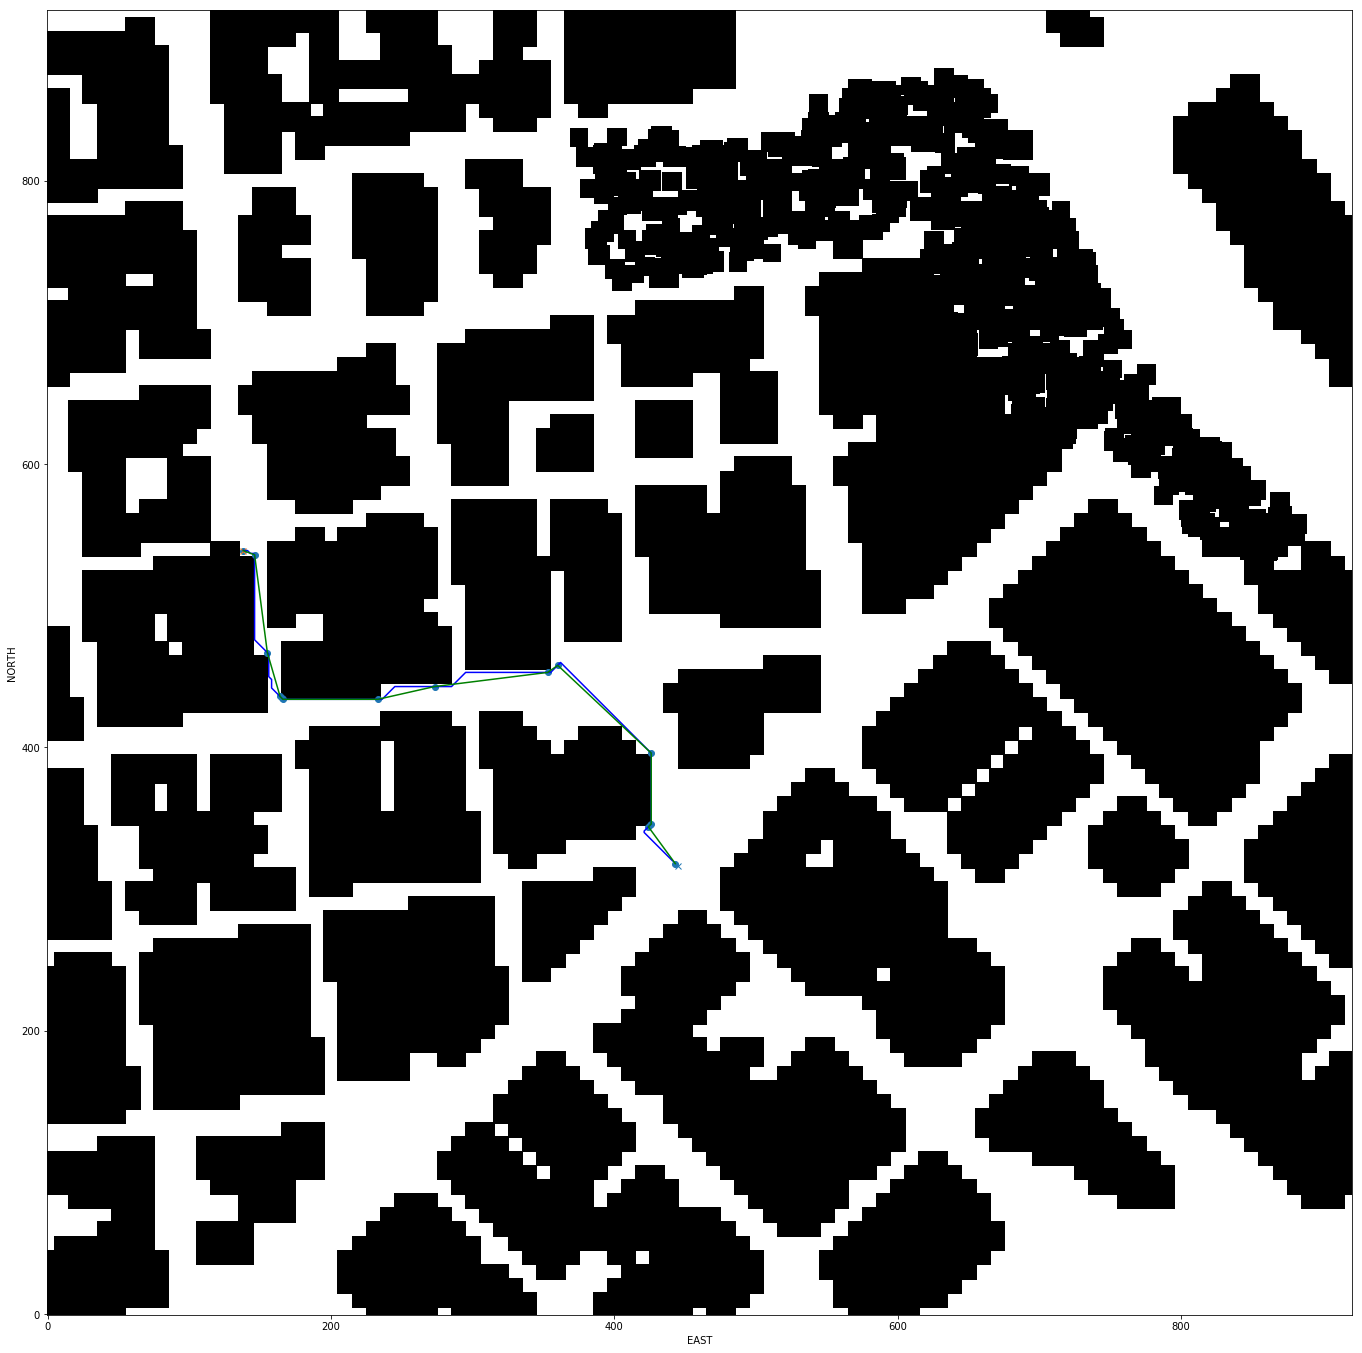

In [20]:
plt.imshow(grid, cmap='Greys', origin='lower')
plt.plot(start_ne[1], start_ne[0], 'x')
plt.plot(goal_ne[1], goal_ne[0], 'x')

pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'b')

pp = np.array(pruned_path)
plt.plot(pp[:, 1], pp[:, 0], 'g')
plt.scatter(pp[:, 1], pp[:, 0])

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

# plan using A* on Voronoi graph

In [21]:
from planning_utils import a_star_graph

In [22]:
%time path, cost = a_star_graph(data, \
                                drone_altitude=5, \
                                safety_distance=5, \
                                start=start_ne, \
                                goal=goal_ne)
print(len(path), cost)

voronoi stats: 3845 landmarks, 9702 ridge_vertices
voronoi stats: 1419 clear ridges
graph start: (315.76114, 445.76846)
graph goal: (539, 138)
Found a path.
path length: 48
CPU times: user 10.9 s, sys: 1.26 s, total: 12.2 s
Wall time: 12.2 s
50 9673.247793508966


In [23]:
from planning_utils import prune_path

In [24]:
%time pruned_path = prune_path(path)
print(len(pruned_path))

CPU times: user 127 µs, sys: 121 µs, total: 248 µs
Wall time: 253 µs
38


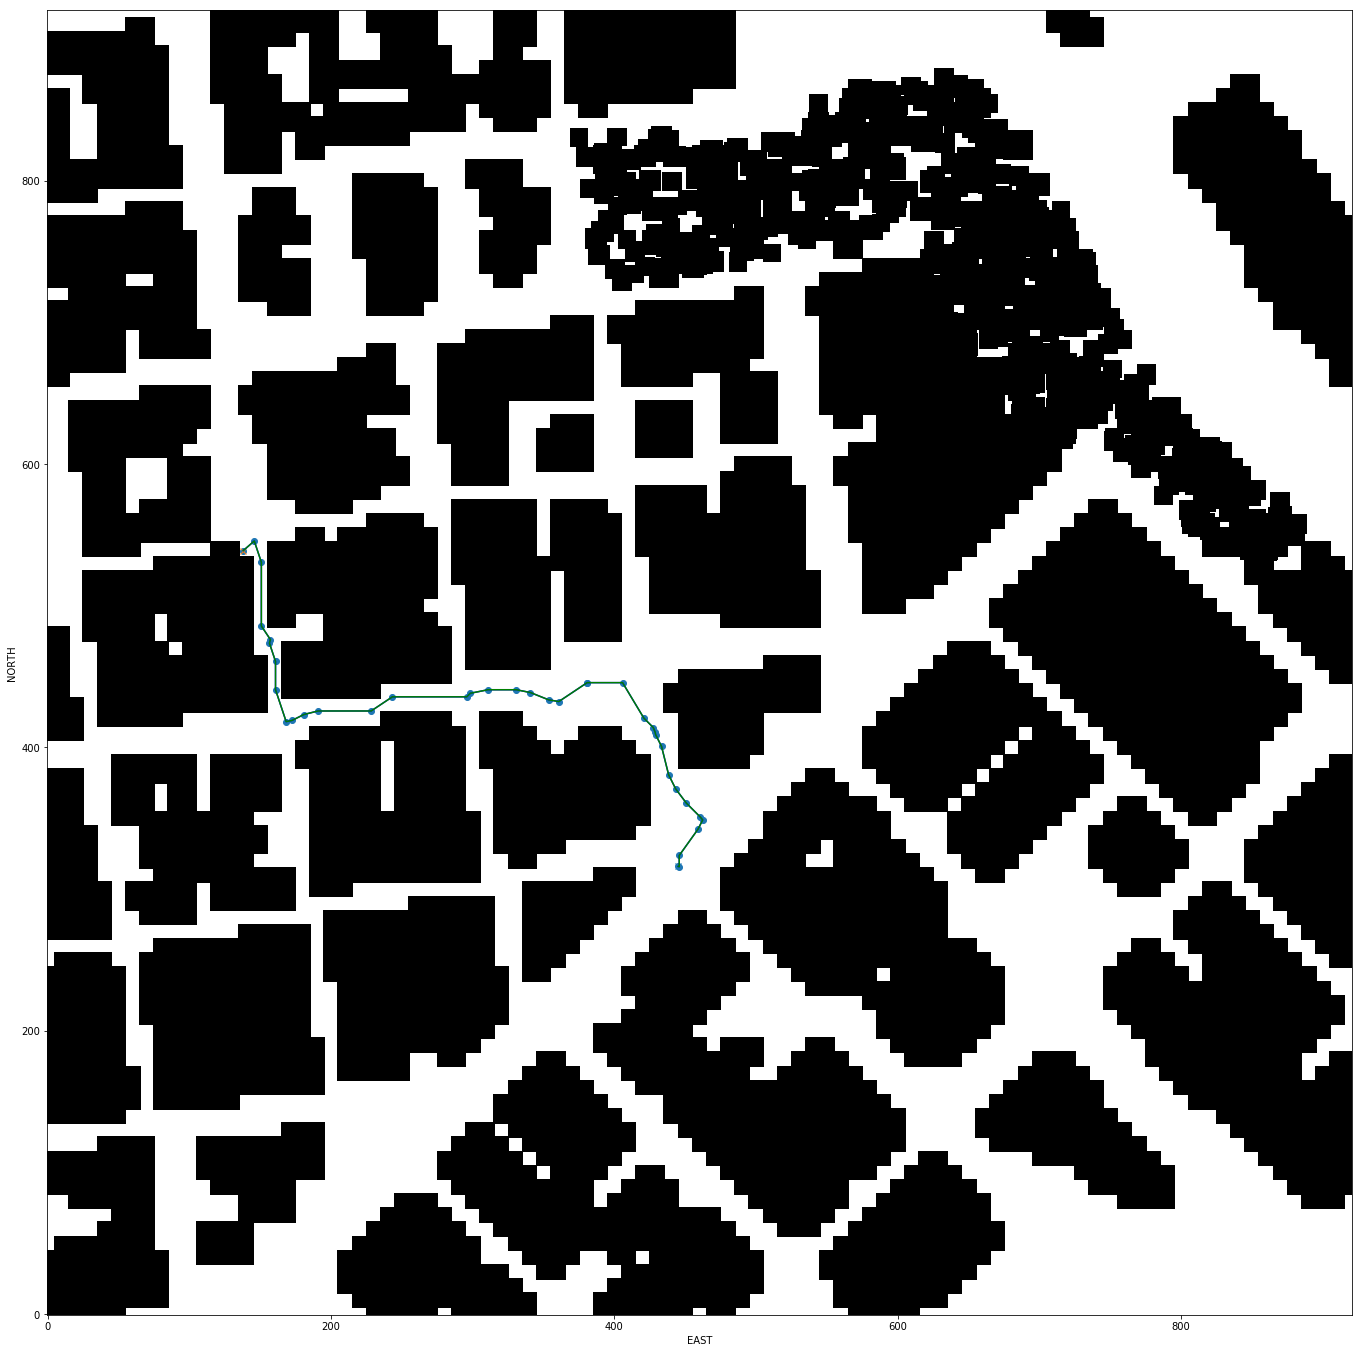

In [25]:
plt.imshow(grid, cmap='Greys', origin='lower')
plt.plot(start_ne[1], start_ne[0], 'x')
plt.plot(goal_ne[1], goal_ne[0], 'x')

pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'b')

pp = np.array(pruned_path)
plt.plot(pp[:, 1], pp[:, 0], 'g')
plt.scatter(pp[:, 1], pp[:, 0])

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

# plan using RRT / A*

In [26]:
from planning_utils import a_star_rrt

In [98]:
%time path, x = a_star_rrt(grid, start_ne, goal_ne, prob_goal=0.1, max_steps=10)

1000 tries of RRT. number of RRT nodes: 364
1000 tries of RRT. number of RRT nodes: 834
graph start: (316, 445)
graph goal: (539, 138)
Found a path.
path length: 123
CPU times: user 6.24 s, sys: 24.4 ms, total: 6.26 s
Wall time: 6.25 s


In [99]:
from planning_utils import prune_path_bres

In [100]:
ppath = prune_path_bres(path, grid)
len(ppath)

16

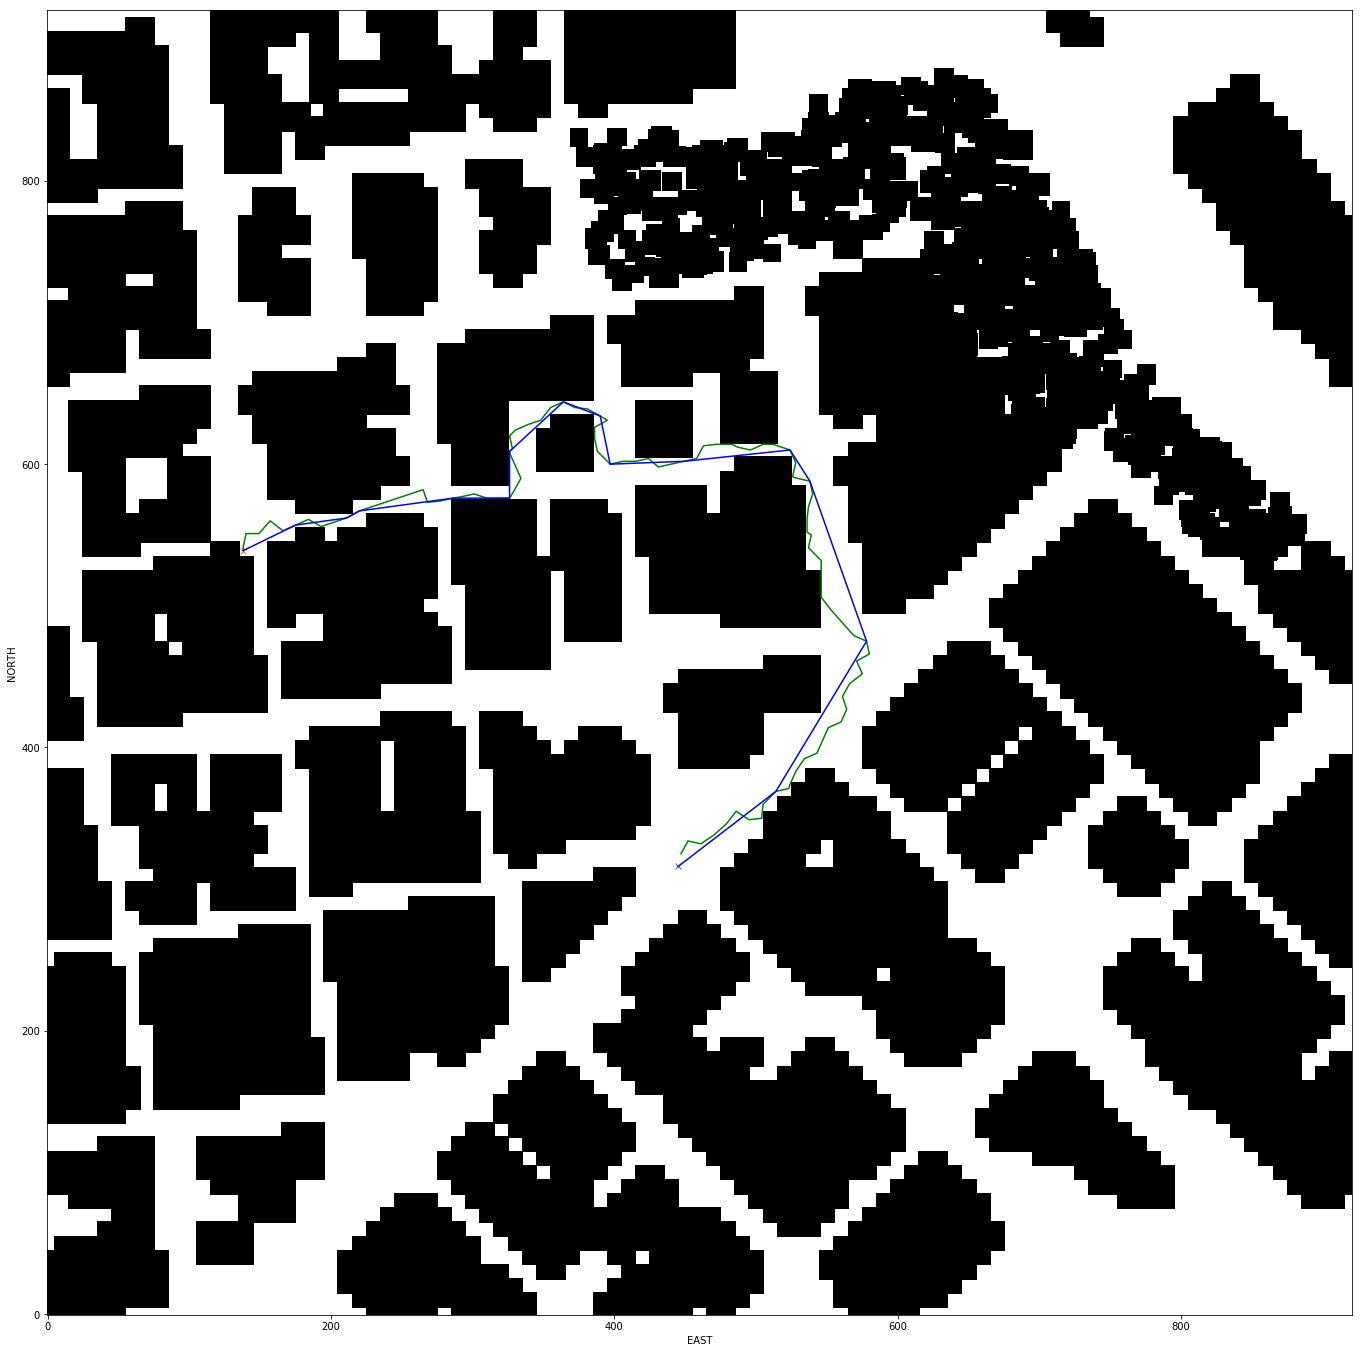

In [101]:
plt.imshow(grid, cmap='Greys', origin='lower')
plt.plot(start_ne[1], start_ne[0], 'x')
plt.plot(goal_ne[1], goal_ne[0], 'x')

pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'g')
pp = np.array(ppath)
plt.plot(pp[:, 1], pp[:, 0], 'b')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()